In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('diabetes.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
y = df['Outcome']
X = df.drop(columns='Outcome')
X.shape, y.shape

((768, 8), (768,))

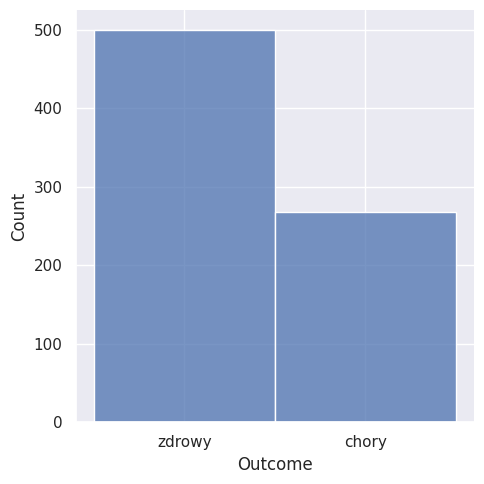

In [4]:
sns.displot(df, x="Outcome", discrete=True)
plt.xticks([0, 1], ['zdrowy', 'chory']);

In [5]:
y.value_counts()

,count
Outcome,
0,500
1,268


In [6]:
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [7]:
(X == 0).sum()/len(df)*100

,0
Pregnancies,14.453125
Glucose,0.651042
BloodPressure,4.557292
SkinThickness,29.557292
Insulin,48.697917
BMI,1.432292
DiabetesPedigreeFunction,0.000000
Age,0.000000


In [8]:
X[['Glucose', 'BloodPressure', 'BMI']] = X[['Glucose', 'BloodPressure', 'BMI']].replace(0, np.NaN)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 48.1 KB


In [9]:
from sklearn.impute import SimpleImputer
X = pd.DataFrame(SimpleImputer(strategy='median').fit_transform(X), columns=X.columns)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
dtypes: float64(8)
memory usage: 48.1 KB


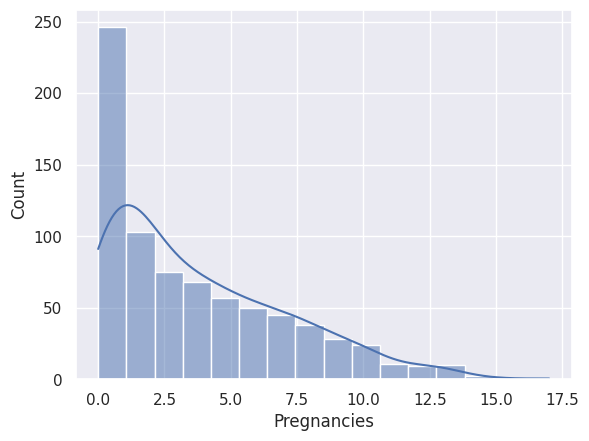

In [10]:
sns.histplot(X, x='Pregnancies', kde=True);

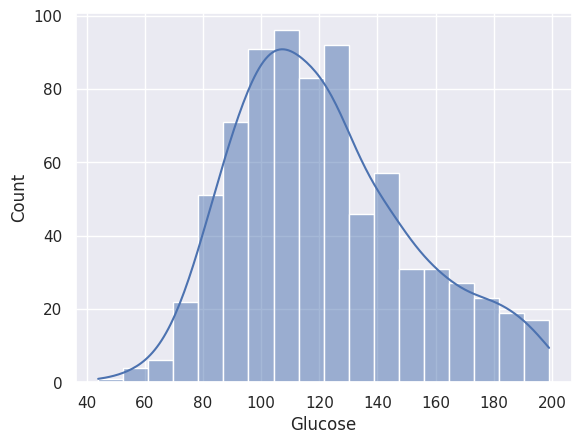

In [11]:
sns.histplot(X, x='Glucose', kde=True);

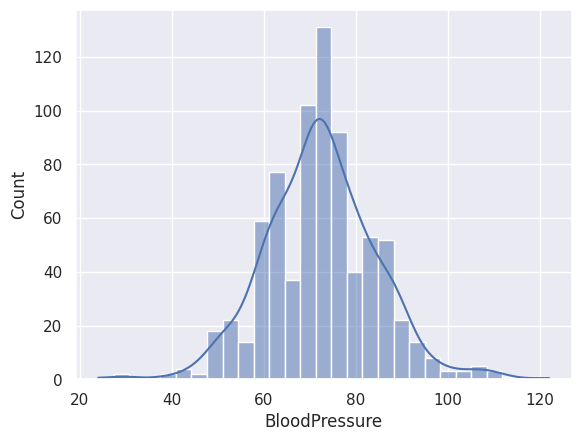

In [12]:
sns.histplot(X, x='BloodPressure', kde=True);

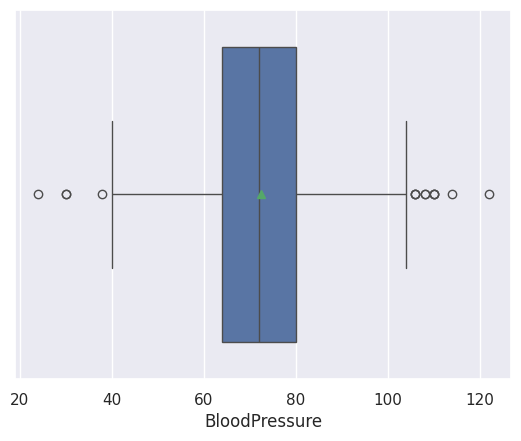

In [13]:
sns.boxplot(X, x='BloodPressure', showmeans=True);

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [16]:
X_std = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.25, stratify=y)

In [18]:
lr = LogisticRegression(penalty=None).fit(X_train, y_train)
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.7760416666666666, 0.75)

In [19]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score,\
 precision_score, recall_score, roc_curve, roc_auc_score, ConfusionMatrixDisplay, RocCurveDisplay

In [21]:
accuracy_score(y_train, y_train_pred)

0.7760416666666666

In [22]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       375
           1       0.72      0.58      0.64       201

    accuracy                           0.78       576
   macro avg       0.76      0.73      0.74       576
weighted avg       0.77      0.78      0.77       576



In [23]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       125
           1       0.67      0.57      0.61        67

    accuracy                           0.75       192
   macro avg       0.73      0.71      0.71       192
weighted avg       0.74      0.75      0.74       192



In [24]:
cm_test = confusion_matrix(y_test, y_test_pred)
cm_test

array([[106,  19],
       [ 29,  38]])

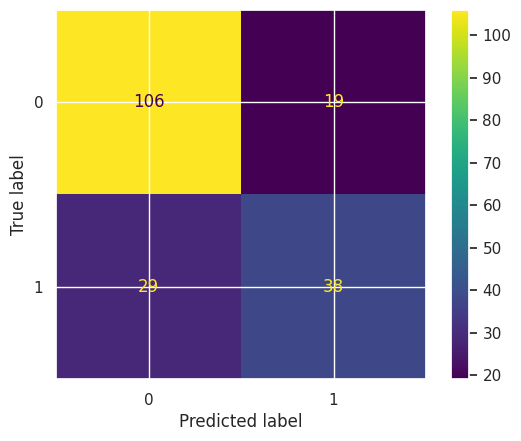

In [27]:
ConfusionMatrixDisplay(cm_test).plot();

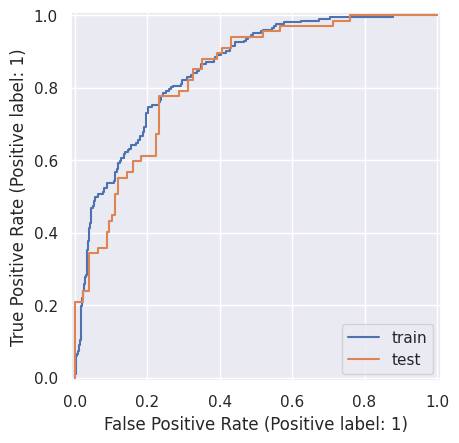

In [51]:
RocCurveDisplay.from_estimator(lr, X_train, y_train, label="train")
RocCurveDisplay.from_estimator(lr, X_test, y_test, label="test", ax=plt.gca())
plt.legend(loc="lower right");

In [30]:
f1_score(y_test, y_test_pred)

0.6129032258064516

In [31]:
recall_score(y_test, y_test_pred)

0.5671641791044776

In [32]:
roc_auc_score(y_test, y_test_pred)

0.7075820895522387

In [40]:
from sklearn.svm import LinearSVC, LinearSVR

In [36]:
svc = LinearSVC(penalty="l2").fit(X_train, y_train)
svc.score(X_train, y_train), svc.score(X_test, y_test)

(0.7725694444444444, 0.7552083333333334)

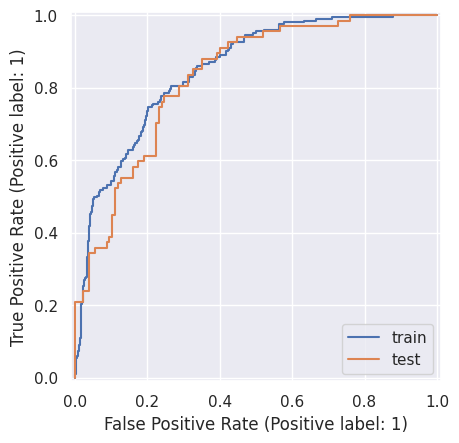

In [50]:
RocCurveDisplay.from_estimator(svc, X_train, y_train, label="train")
RocCurveDisplay.from_estimator(svc, X_test, y_test, label="test", ax=plt.gca())
plt.legend(loc="lower right");

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
dtc = DecisionTreeClassifier().fit(X_train, y_train)
dtc.score(X_train, y_train), dtc.score(X_test, y_test)

(1.0, 0.671875)

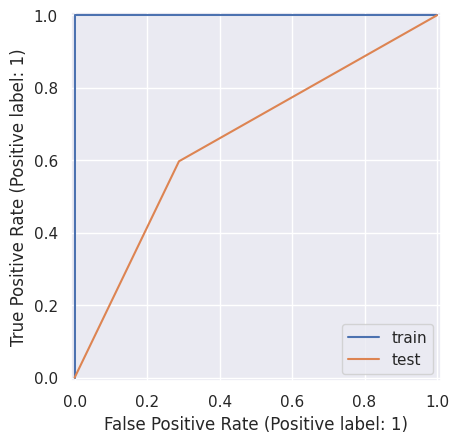

In [49]:
RocCurveDisplay.from_estimator(dtc, X_train, y_train, label="train")
RocCurveDisplay.from_estimator(dtc, X_test, y_test, label="test", ax=plt.gca())
plt.legend(loc="lower right");

### Variable encoding

In [ ]:
# getDummyEncoding - pandas
# OneHotEncoder - sklearn
# OrdinalEncoder - sklearn
# LabelEncoder - sklearn

In [53]:
df = pd.read_csv("heart.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [59]:
# df['Sex'].unique(), df['ChestPainType'].unique()
for col in ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']:
  print(f'{col}:\t{df[col].unique()}')

Sex:	['M' 'F']
ChestPainType:	['ATA' 'NAP' 'ASY' 'TA']
RestingECG:	['Normal' 'ST' 'LVH']
ExerciseAngina:	['N' 'Y']
ST_Slope:	['Up' 'Flat' 'Down']


In [61]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [62]:
le = LabelEncoder()
oe = OrdinalEncoder(categories=['Down', 'Flat', 'Up'])

In [63]:
df_coded = df.copy()
for col in ['Sex','ExerciseAngina']:
  df_coded[col] = le.fit_transform(df[col])
df_coded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 86.2+ KB


In [67]:
cat_cols = ['ChestPainType', 'RestingECG']
# df_coded.drop(cat_cols, inplace=True)
df_coded = pd.concat([df_coded, pd.get_dummies(df[cat_cols], dtype="int64")])
df_coded.info()